<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-1-yiheng/blob/main/Math_5760_6890%2C_Data_Project_No_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5760/6890, Data Project No. 1

Yi-Heng Tsai, u1420163

**Problem 1.** Pick five stocks/ETFs that you are familiar with or have an interest. Make sure that you cover the market with some high and low volatility assets. Explain your choices with some background information.

---

1.   **NBIS.** Formerly known as Yandex N.V., NBIS is a technology company focusing on artificial intelligence (AI). I chose it because it represents a fast-developing and high-volatility sector.
2.   **TSM.** Taiwan Semiconductor Manufacturing Company is one of the world's largest semiconductor manufacturers. It plays a key role in the global tech supply chain .
3.   **COST.** Costco Wholesale Corporation is a retail company that I personally shop at every week. I included it to represent the consumer sector.
4.   **JPM.** JPMorgan Chase & Co. is one of the largest financial institutions in the world. I selected it to include a financial-sector asset that differs from the technology and retail industries.
5.   **DUK.** Duke Energy Corporation is a major U.S. utility company. I chose it to represent a low-volatility, defensive asset that tends to perform steadily even in uncertain markets.

**Problem 2.** Download the daily prices over the past year. One good tool to use is the website https://bulkstockdatadownloader.app provided in our resource page.

---

The line chart below shows the daily prices of the five selected stocks/ETFs over the past year.

Daily Prices (past 1 year):
                   COST         DUK         JPM        NBIS         TSM
Date                                                                  
2024-10-04  878.601196  109.977486  207.847000         NaN  179.230331
2024-10-07  869.129822  106.293884  207.561630         NaN  182.544632
2024-10-08  885.873840  106.718178  207.384491         NaN  184.068237
2024-10-09  904.458496  107.344971  210.011856         NaN  185.146622
2024-10-10  889.067505  109.080688  209.441132         NaN  183.801117
...                ...         ...         ...         ...         ...
2025-09-29  916.869995  122.800003  315.690002  110.220001  273.230011
2025-09-30  925.630005  123.750000  315.429993  112.269997  279.290009
2025-10-01  917.340027  122.389999  310.709991  115.610001  288.470001
2025-10-02  916.770020  121.570000  307.549988  125.870003  288.109985
2025-10-03  915.380005  123.540001  310.029999  127.980003  292.190002

[250 rows x 5 columns]


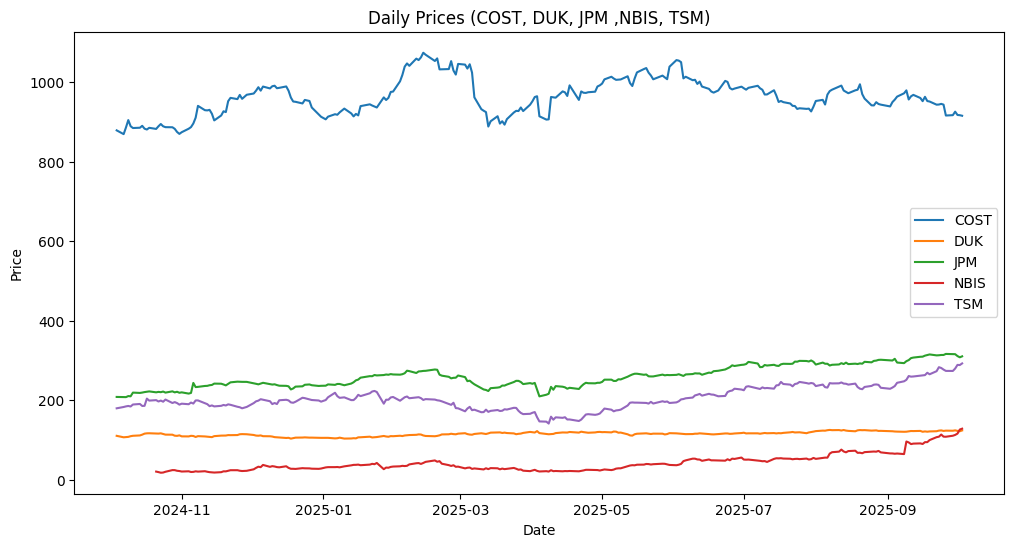

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("W2PD8ID4.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print("Daily Prices (past 1 year):\n",df)

plt.figure(figsize=(12,6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.title("Daily Prices (COST, DUK, JPM ,NBIS, TSM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

**Problem 3.** Compute both arithmetic and log returns over the one year period as the basis for the estimates that follow. The key estimates are the expected returns for individual stocks/ETFs and the covariance matrix for returns, using one of the standard functions (covariance for Excel, cov for both Matlab and R, and numpy.cov for Python) in your choice of programming platforms.

---

The arithmetic and logarithmic returns are calculated as follows.

Arithmetic Returns:

                COST       DUK       JPM      NBIS       TSM
Date                                                        
2024-10-04       NaN       NaN       NaN       NaN       NaN
2024-10-07 -0.010780 -0.033494 -0.001373       NaN  0.018492
2024-10-08  0.019265  0.003992 -0.000853       NaN  0.008346
2024-10-09  0.020979  0.005873  0.012669       NaN  0.005859
2024-10-10 -0.017017  0.016170 -0.002718       NaN -0.007267
...              ...       ...       ...       ...       ...
2025-09-29  0.001004 -0.001788 -0.001171  0.023398 -0.000475
2025-09-30  0.009554  0.007736 -0.000824  0.018599  0.022179
2025-10-01 -0.008956 -0.010990 -0.014964  0.029750  0.032869
2025-10-02 -0.000621 -0.006700 -0.010170  0.088747 -0.001248
2025-10-03 -0.001516  0.016205  0.008064  0.016763  0.014161

[250 rows x 5 columns]

Log Returns:

                COST       DUK       JPM      NBIS       TSM
Date                                                        
2024-10-04       NaN     

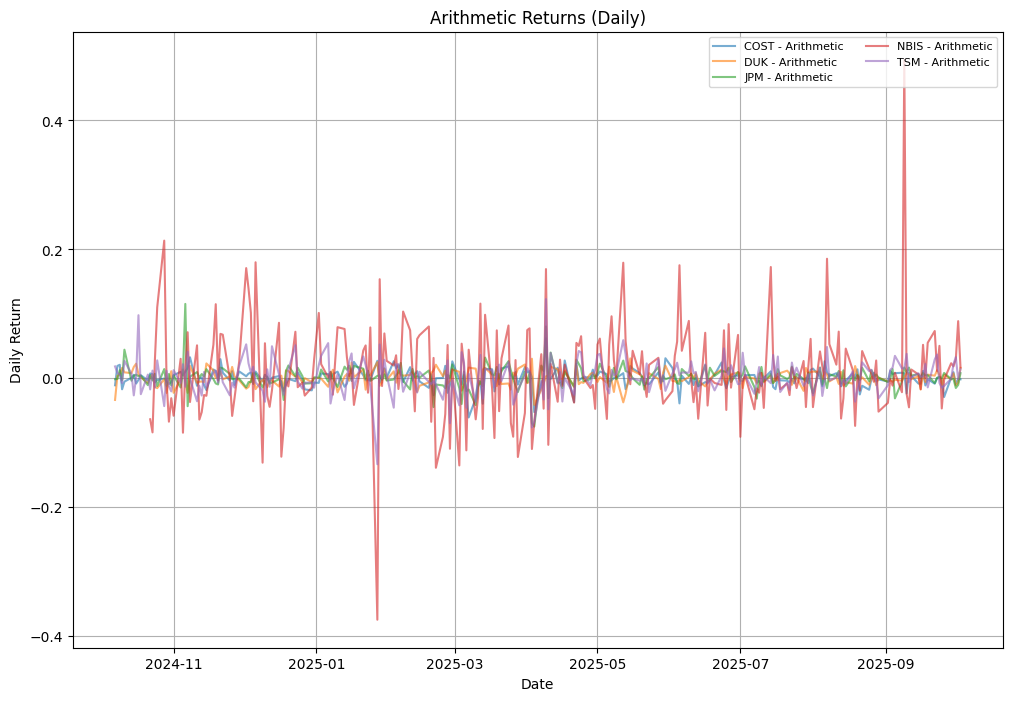

In [3]:
arith_returns = df.pct_change()
log_returns = np.log(df/df.shift(1))

print("Arithmetic Returns:\n")
print(arith_returns)
print("\nLog Returns:\n")
print(log_returns)

plt.figure(figsize=(12,8))
for col in df.columns:
    plt.plot(arith_returns.index, arith_returns[col], label=f"{col} - Arithmetic", alpha=0.6)

plt.title("Arithmetic Returns (Daily)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(loc="upper right", fontsize=8, ncol=2)
plt.grid(True)
plt.show()

The expected returns for individual stocks/ETFs and the covariance matrix for returns:

In [4]:
exp_arith_returns = arith_returns.mean()
exp_log_returns = log_returns.mean()
cov_matrix = arith_returns.cov()

print("\nExpected Arithmetic Returns (daily):\n")
print(exp_arith_returns)
print("\nExpected Log Returns (daily):\n")
print(exp_log_returns)
print("\nCovariance Matrix of Arithmetic Returns:\n")
print(cov_matrix)



Expected Arithmetic Returns (daily):

COST    0.000256
DUK     0.000531
JPM     0.001748
NBIS    0.010522
TSM     0.002310
dtype: float64

Expected Log Returns (daily):

COST    0.000165
DUK     0.000467
JPM     0.001606
NBIS    0.007799
TSM     0.001963
dtype: float64

Covariance Matrix of Arithmetic Returns:

          COST       DUK       JPM      NBIS       TSM
COST  0.000184  0.000031  0.000078  0.000118  0.000058
DUK   0.000031  0.000128  0.000015 -0.000205 -0.000057
JPM   0.000078  0.000015  0.000286  0.000296  0.000140
NBIS  0.000118 -0.000205  0.000296  0.005516  0.000959
TSM   0.000058 -0.000057  0.000140  0.000959  0.000692


**Problem 4.** Use the formulas for w in the textbook (or the lecture notes) to find the following three portfolios:

(a). The global minimum variance portfolio;

(b). The market portfolio based on these five stocks/ETFs, assuming the risk-free rate r = 2%;

(c). The diversified portfolio (market portfolio assuming r = 0).

---

(a). The global minimum variance portfolio:

In [5]:
C=cov_matrix
C_inv = np.linalg.inv(C)
u = np.ones(5)
m = exp_arith_returns

w_MVP = C_inv @ u / (u.T @ C_inv @ u)
print("Global minimum variance portfolio (MVP):\n [COST, DUK, JPM ,NBIS, TSM] = ", w_MVP)

Global minimum variance portfolio (MVP):
 [COST, DUK, JPM ,NBIS, TSM] =  [0.2207095  0.55986012 0.11038399 0.00541798 0.10362842]


(b) & (c). Using the formulas introduced in class, the market portfolio and the diversified portfolio are obtained as follows. ***Note that the expected return of the MVP (−0.000140) is below the assumed risk-free rate (2% or 0%), implying that, theoretically, no market or diversified portfolio exists.***

In [6]:
w_M = C_inv @ (m-0.02*u) / (u.T @ C_inv @ (m-0.02*u))
print("The market portfolio:\n [COST, DUK, JPM ,NBIS, TSM] = ", w_M)

w_D = C_inv @ m / (u.T @ C_inv @ m)
print("The diversified portfolio:\n [COST, DUK, JPM ,NBIS, TSM] = ", w_D)

The market portfolio:
 [COST, DUK, JPM ,NBIS, TSM] =  [ 0.2426412   0.55466967  0.09901286 -0.00163711  0.10531337]
The diversified portfolio:
 [COST, DUK, JPM ,NBIS, TSM] =  [-0.27744801  0.67775624  0.36866808  0.16566742  0.06535627]


**Problem 5.** Once you find such optimal portfolios (the respective w vectors), use the stock price data to simulate the portfolio values over the past three month period and estimate the portfolio volatility. Compare the portfolio return and the portfolio volatility with those of the five individual stocks/ETFs to demonstrate the advantages of such optimal portfolios. This procedure to test strategies on past historical data is called backtesting. One suggested measure for performance is the Sharpe ratio S = μ - r/ σ where μ can be the realized return (annualized), and σ^2(t_2 - t_1) should be the total variance of the returns of the portfolio over the time period [t_1, t_2].

---


The portfolio values over the past three month period:

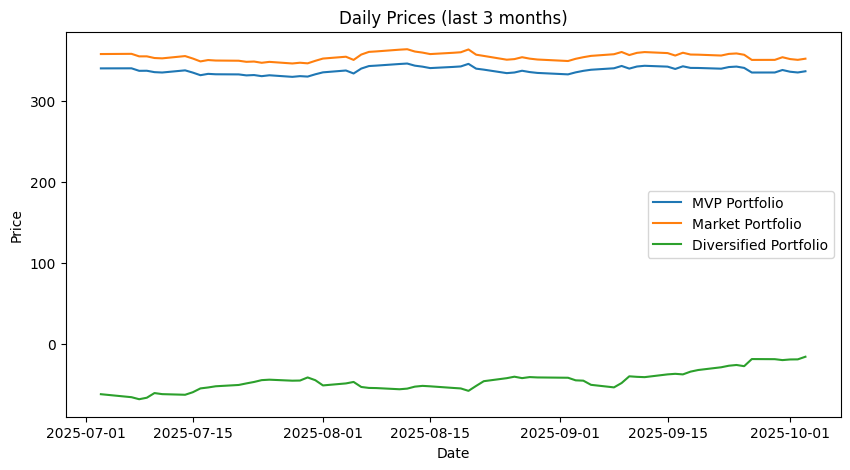

In [14]:
P_MVP = w_MVP[0]*df['COST'] + w_MVP[1]*df['DUK'] + w_MVP[2]*df['JPM'] + w_MVP[3]*df['NBIS'] + w_MVP[4]*df['TSM']
P_M = w_M[0]*df['COST'] + w_M[1]*df['DUK'] + w_M[2]*df['JPM'] + w_M[3]*df['NBIS'] + w_M[4]*df['TSM']
P_D = w_D[0]*df['COST'] + w_D[1]*df['DUK'] + w_D[2]*df['JPM'] + w_D[3]*df['NBIS'] + w_D[4]*df['TSM']

end_date = df.index.max()
start_date = end_date - pd.DateOffset(months=3)

df_last3m = df.loc[start_date:end_date]
P_MVP_last3m = P_MVP.loc[start_date:end_date]
P_M_last3m = P_M.loc[start_date:end_date]
P_D_last3m = P_D.loc[start_date:end_date]

plt.figure(figsize=(10,5))
plt.plot(P_MVP_last3m.index, P_MVP_last3m.values, label='MVP Portfolio')
plt.plot(P_M_last3m.index, P_M_last3m.values, label='Market Portfolio')
plt.plot(P_D_last3m.index, P_D_last3m.values, label='Diversified Portfolio')
plt.title("Daily Prices (last 3 months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

The portfolio return and the portfolio volatility:

In [15]:
exp_return_last3m = df_last3m.pct_change().mean()
var_last3m = df_last3m.pct_change().var()
exp_MVP = P_MVP_last3m.pct_change().mean()
var_MVP = P_MVP_last3m.pct_change().var()
exp_M = P_M_last3m.pct_change().mean()
var_M = P_M_last3m.pct_change().var()
exp_D = P_D_last3m.pct_change().mean()
var_D = P_D_last3m.pct_change().var()
print("Over the past 3 months")
for col in df_last3m.columns:
  print(f"Expected return of {col}: {exp_return_last3m[col]:.6f}")
  print(f"Variance of {col}: {var_last3m[col]:.6f}\n")
print(f"Expected return of MVP portfolio: {exp_MVP:.6f}")
print(f"Variance of MVP portfolio: {var_MVP:.6f}")
print(f"\nExpected return of market portfolio: {exp_M:.6f}")
print(f"Variance of market portfolio: {var_M:.6f}")
print(f"\nExpected return of diversified portfolio: {exp_D:.6f}")
print(f"Variance of diversified portfolio: {var_D:.6f}")

Over the past 3 months
Expected return of COST: -0.001104
Variance of COST: 0.000103

Expected return of DUK: 0.000977
Variance of DUK: 0.000068

Expected return of JPM: 0.000781
Variance of JPM: 0.000115

Expected return of NBIS: 0.017098
Variance of NBIS: 0.005818

Expected return of TSM: 0.003590
Variance of TSM: 0.000343

Expected return of MVP portfolio: -0.000140
Variance of MVP portfolio: 0.000048

Expected return of market portfolio: -0.000227
Variance of market portfolio: 0.000051

Expected return of diversified portfolio: -0.018273
Variance of diversified portfolio: 0.005560


The scatter plot shows that the MVP (in red) has the lowest variance.

In [16]:
!pip install adjustText

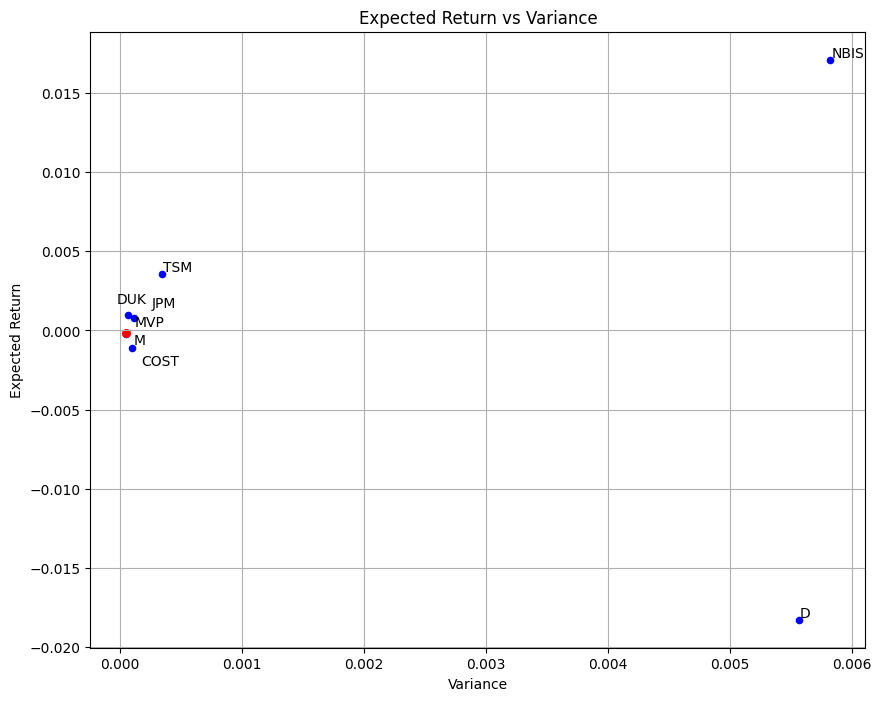

In [18]:
from adjustText import adjust_text
x = list(var_last3m) + [var_MVP, var_M, var_D]
y = list(exp_return_last3m) + [exp_MVP, exp_M, exp_D]
labels = ['COST', 'DUK', 'JPM', 'NBIS', 'TSM', 'MVP', 'M', 'D']

plt.figure(figsize=(10,8))
plt.scatter(x, y, c='blue', s=20)
plt.scatter(x[5], y[5], c='red', s=30)

texts = []
for i, label in enumerate(labels):
    texts.append(plt.text(x[i], y[i], label, fontsize=10))
adjust_text(texts)

plt.xlabel("Variance")
plt.ylabel("Expected Return")
plt.title("Expected Return vs Variance")
plt.grid(True)
plt.show()

Assuming a risk-free rate of 2%, the Sharpe ratios are calculated and summarized in the table below. Because their expected returns are below 2%, none of the portfolios outperform the risk-free asset.

In [19]:
std_dev = np.sqrt(x)
sharpe_ratio = []
for i in range(len(x)):
  sharpe_ratio.append((y[i]-0.02)/std_dev[i])

df_sharpe = pd.DataFrame({
    'Asset': labels,
    'Expected Return': y,
    'Variance': x,
    'Std Dev': std_dev,
    'Sharpe Ratio': sharpe_ratio
})
print("Assume the risk-free rate is 2%.")
df_sharpe = df_sharpe.round(6)
print(df_sharpe)

Assume the risk-free rate is 2%.
  Asset  Expected Return  Variance   Std Dev  Sharpe Ratio
0  COST        -0.001104  0.000103  0.010141     -2.081164
1   DUK         0.000977  0.000068  0.008271     -2.299886
2   JPM         0.000781  0.000115  0.010718     -1.793134
3  NBIS         0.017098  0.005818  0.076278     -0.038046
4   TSM         0.003590  0.000343  0.018518     -0.886140
5   MVP        -0.000140  0.000048  0.006937     -2.903321
6     M        -0.000227  0.000051  0.007135     -2.835038
7     D        -0.018273  0.005560  0.074567     -0.513261
